In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%cd ..

d:\Projects\my-ds-template


## 1. Data overview

In [2]:
df_growth = pd.read_csv('data/processed/genshin_character_growth.csv')
df_lv_90 = pd.read_csv('data/processed/genshin_character.csv')

In [3]:
# number of categories
# balance between categories
categorical_var_columns = [
                       'Rarity',
                       'Weapon',
                       'Region',
                       'Main role',
                       'Ascension Stat'
                        ]
# min, max, mean, std
# distribution
continue_var_columns = [
                    'Base HP',
                    'Base ATK',
                    'Base DEF',
                    # 'Ascension',
                    # 'Lv'
                    ]

## 2. Frequency Distribution

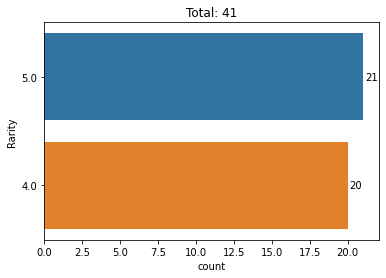

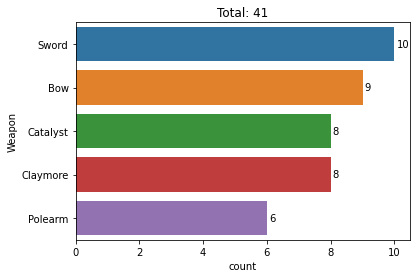

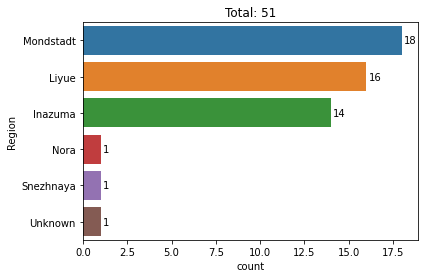

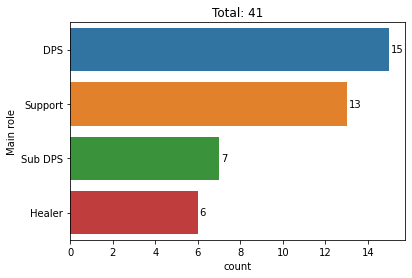

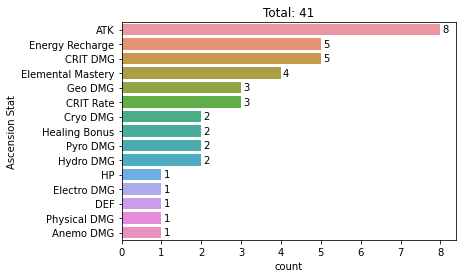

In [4]:
for c in categorical_var_columns:
    plt.figure()
    # order bars by count 
    ax = sns.countplot(y=c, data=df_lv_90[~df_lv_90[c].isna()], order=df_lv_90[c].value_counts().index)
    for bars in ax.containers:
        ax.bar_label(bars, fmt='%g', label_type='edge', padding=2)
    plt.title(f'Total: {sum(~df_lv_90[c].isna())}')

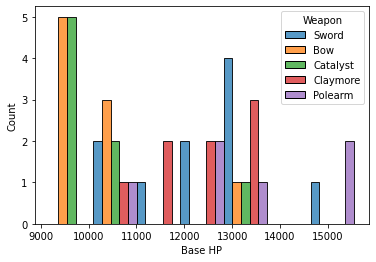

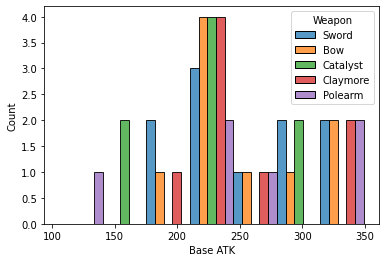

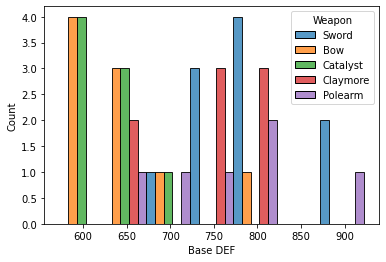

In [5]:
for c in continue_var_columns:
    plt.figure()
    sns.histplot(x=c, data=df_lv_90, multiple="dodge", hue='Weapon')  # , hue='Main role' Weapon, Main role

## Measures of Central Tendency

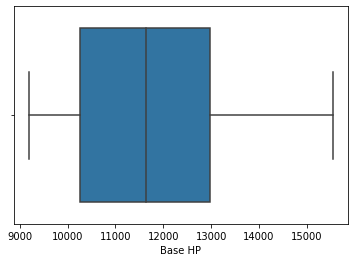

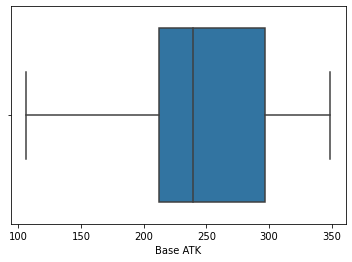

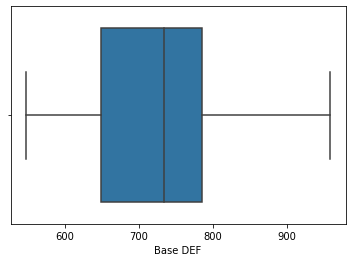

In [6]:
for c in ['Base HP','Base ATK','Base DEF']:
    plt.figure()
    sns.boxplot(x=c, data=df_lv_90)

In [7]:
df_lv_90[continue_var_columns].describe()

,Base HP,Base ATK,Base DEF
count,51.000000,51.000000,51.000000
mean,11630.843137,249.058824,716.411765
std,1678.846704,55.402676,96.496047
min,9189.000000,106.000000,547.000000
25%,10254.000000,212.000000,648.000000
50%,11636.000000,239.000000,734.000000
75%,12986.000000,297.000000,786.000000
max,15552.000000,349.000000,959.000000


In [8]:
pd.concat([df_lv_90.sort_values(by='Base HP').head(3),df_lv_90.sort_values(by='Base HP').tail(3)])

,ID,height,Region,gender,Character,Rarity,Element,Weapon,Main role,Ascension Stat,Ascension Stat Value,Base DEF,Base HP,Base ATK
11,fischl,Medium,Mondstadt,Female,Fischl,4.0,Electro,Bow,Sub DPS,ATK,24.0%,593,9189,244
36,sucrose,Medium,Mondstadt,Female,Sucrose,4.0,Anemo,Catalyst,Support,Anemo DMG,24.0%,702,9243,169
46,yanfei,Medium,Liyue,Female,Yanfei,4.0,Pyro,Catalyst,DPS,Pyro DMG,24.0%,586,9352,240
15,jean,Tall,Mondstadt,Female,Jean,5.0,Anemo,Sword,Healer,Healing Bonus,22.0%,768,14695,239
50,zhongli,Tall,Liyue,Male,Zhongli,5.0,Geo,Polearm,Support,Geo DMG,28.8%,737,14695,251
14,hutao,Medium,Liyue,Female,Hutao,5.0,Pyro,Polearm,DPS,CRIT DMG,38.4%,876,15552,106


In [9]:
pd.concat([df_lv_90.sort_values(by='Base ATK').head(3),df_lv_90.sort_values(by='Base ATK').tail(3)])

,ID,height,Region,gender,Character,Rarity,Element,Weapon,Main role,Ascension Stat,Ascension Stat Value,Base DEF,Base HP,Base ATK
14,hutao,Medium,Liyue,Female,Hutao,5.0,Pyro,Polearm,DPS,CRIT DMG,38.4%,876,15552,106
4,barbara,Medium,Mondstadt,Female,Barbara,4.0,Hydro,Catalyst,Healer,HP,24.0%,668,9787,159
36,sucrose,Medium,Mondstadt,Female,Sucrose,4.0,Anemo,Catalyst,Support,Anemo DMG,24.0%,702,9243,169
18,kamisatoayaka,Medium,Inazuma,Female,Ayaka,5.0,Cryo,Sword,DPS,CRIT DMG,38.4%,783,12858,342
10,eula,Tall,Mondstadt,Female,Eula,5.0,Cryo,Claymore,DPS,CRIT DMG,38.4%,750,13225,342
42,xiao,Medium,Liyue,Male,Xiao,5.0,Anemo,Polearm,DPS,CRIT Rate,19.2%,799,12735,349


In [10]:
pd.concat([df_lv_90.sort_values(by='Base DEF').head(3),df_lv_90.sort_values(by='Base DEF').tail(3)])

,ID,height,Region,gender,Character,Rarity,Element,Weapon,Main role,Ascension Stat,Ascension Stat Value,Base DEF,Base HP,Base ATK
47,yelan,Tall,Liyue,Female,NaN,NaN,NaN,NaN,NaN,NaN,19.2%,547,14450,243
45,yaemiko,Tall,Inazuma,Female,NaN,NaN,NaN,NaN,NaN,NaN,19.2%,568,10372,339
26,ningguang,Tall,Liyue,Female,Ningguang,4.0,Geo,Catalyst,DPS,Geo DMG,24.0%,573,9787,212
0,albedo,Medium,Mondstadt,Male,Albedo,5.0,Geo,Sword,Support,Geo DMG,28.8%,876,13225,251
28,qiqi,Short,Liyue,Female,Qiqi,5.0,Cryo,Sword,Healer,Healing Bonus,22.0%,922,12368,287
3,aratakiitto,Tall,Inazuma,Male,NaN,NaN,NaN,NaN,NaN,NaN,19.2%,959,12858,227


## Outliers/Anomalies

In [11]:
df_lv_90.drop_duplicates(['Ascension Stat', 'Ascension Stat Value'], keep=False).sort_values(by='Ascension Stat')

,ID,height,Region,gender,Character,Rarity,Element,Weapon,Main role,Ascension Stat,Ascension Stat Value,Base DEF,Base HP,Base ATK
36,sucrose,Medium,Mondstadt,Female,Sucrose,4.0,Anemo,Catalyst,Support,Anemo DMG,24.0%,702,9243,169
1,aloy,Medium,Nora,Female,Aloy,5.0,Cryo,Bow,DPS,Cryo DMG,28.8%,676,10898,233
9,diona,Short,Mondstadt,Female,Diona,4.0,Cryo,Bow,Support,Cryo DMG,24.0%,600,9569,212
27,noelle,Medium,Mondstadt,Female,Noelle,4.0,Geo,Claymore,Support,DEF,30.0%,798,12071,191
5,beidou,Tall,Liyue,Female,Beidou,4.0,Electro,Claymore,Sub DPS,Electro DMG,24.0%,648,13049,225
16,kaedeharakazuha,Medium,Inazuma,Male,Kazuha,5.0,Anemo,Sword,Support,Elemental Mastery,115.2,806,13348,296
26,ningguang,Tall,Liyue,Female,Ningguang,4.0,Geo,Catalyst,DPS,Geo DMG,24.0%,573,9787,212
4,barbara,Medium,Mondstadt,Female,Barbara,4.0,Hydro,Catalyst,Healer,HP,24.0%,668,9787,159
30,razor,Medium,Mondstadt,Male,Razor,4.0,Electro,Claymore,DPS,Physical DMG,30.0%,750,11962,233
21,klee,Short,Mondstadt,Female,Klee,5.0,Pyro,Catalyst,DPS,Pyro DMG,28.8%,614,10286,310


- Assumptions  
- Outliers/Anomalies  
